# 1 - Imports et configuration : 

In [18]:
# Nos librairies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
plt.style.use("seaborn-v0_8")


# 2 Chargement de données : 

In [20]:
df = pd.read_csv("../data/raw/train.csv")

df.head()


,Unnamed: 0,film-url,review,polarity
0,0,http://www.allocine.fr/film/fichefilm-135259/c...,Si vous cherchez du cinéma abrutissant à tous ...,0
1,1,http://www.allocine.fr/film/fichefilm-172430/c...,"Trash, re-trash et re-re-trash...! Une horreur...",0
2,2,http://www.allocine.fr/film/fichefilm-15105/cr...,"Et si, dans les 5 premières minutes du film, l...",0
3,3,http://www.allocine.fr/film/fichefilm-188629/c...,Mon dieu ! Quelle métaphore filée ! Je suis ab...,0
4,4,http://www.allocine.fr/film/fichefilm-23514/cr...,"Premier film de la saga Kozure Okami, ""Le Sabr...",1


# 3 Structure du dataset : 

In [21]:
df.info()

# Nous avons donc 160 000  lignes et 4 colonnes, dont aucune ne contient de valeurs nulles.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160000 entries, 0 to 159999
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Unnamed: 0  160000 non-null  int64 
 1   film-url    160000 non-null  object
 2   review      160000 non-null  object
 3   polarity    160000 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 4.9+ MB


# 4 - Nettoyage de base :

In [22]:
# Supprimons la colonne inutile
df = df.drop(columns=["Unnamed: 0"])

df.head()


,film-url,review,polarity
0,http://www.allocine.fr/film/fichefilm-135259/c...,Si vous cherchez du cinéma abrutissant à tous ...,0
1,http://www.allocine.fr/film/fichefilm-172430/c...,"Trash, re-trash et re-re-trash...! Une horreur...",0
2,http://www.allocine.fr/film/fichefilm-15105/cr...,"Et si, dans les 5 premières minutes du film, l...",0
3,http://www.allocine.fr/film/fichefilm-188629/c...,Mon dieu ! Quelle métaphore filée ! Je suis ab...,0
4,http://www.allocine.fr/film/fichefilm-23514/cr...,"Premier film de la saga Kozure Okami, ""Le Sabr...",1


In [23]:
# Renommons les colonnes pour plus de clarté
df = df.rename(columns={
    "review": "text",
    "polarity": "sentiment"
})

df.head()


,film-url,text,sentiment
0,http://www.allocine.fr/film/fichefilm-135259/c...,Si vous cherchez du cinéma abrutissant à tous ...,0
1,http://www.allocine.fr/film/fichefilm-172430/c...,"Trash, re-trash et re-re-trash...! Une horreur...",0
2,http://www.allocine.fr/film/fichefilm-15105/cr...,"Et si, dans les 5 premières minutes du film, l...",0
3,http://www.allocine.fr/film/fichefilm-188629/c...,Mon dieu ! Quelle métaphore filée ! Je suis ab...,0
4,http://www.allocine.fr/film/fichefilm-23514/cr...,"Premier film de la saga Kozure Okami, ""Le Sabr...",1


In [29]:
# Supprimons les textes vides
df = df.dropna(subset=["text", "sentiment"])

df.reset_index(drop=True, inplace=True)

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160000 entries, 0 to 159999
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   film-url     160000 non-null  object
 1   text         160000 non-null  object
 2   sentiment    160000 non-null  int64 
 3   text_length  160000 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 4.9+ MB


# 5 - Vérification des labels :

In [ ]:
df["sentiment"].value_counts()

# COnvention : 1 = positif, 0 = négatif


sentiment
1    80587
0    79413
Name: count, dtype: int64

# 6 - Longueur des avis (EDA NLP)

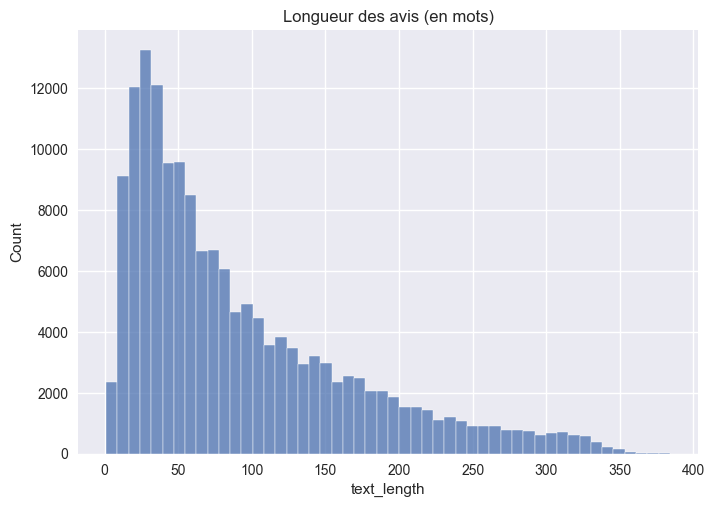

In [25]:
df["text_length"] = df["text"].str.split().apply(len)

sns.histplot(df["text_length"], bins=50)
plt.title("Longueur des avis (en mots)")
plt.show()


Nous avons beaucoup d'avis court, moins de 50 caracteres.

# 7 - Longueur par sentiement :

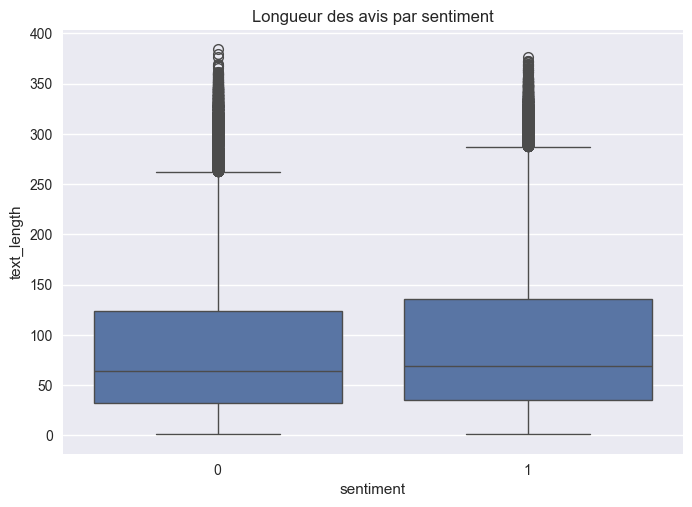

In [26]:
sns.boxplot(
    x="sentiment",
    y="text_length",
    data=df
)
plt.title("Longueur des avis par sentiment")
plt.show()


# 8 - Exemples d'avis par sentiement :

In [27]:
for label in df["sentiment"].unique():
    print(f"\n--- SENTIMENT {label} ---")
    display(df[df["sentiment"] == label]["text"].sample(3, random_state=42))
    


--- SENTIMENT 0 ---


109887    Malgré une scène d'entrée superbe, la mise en ...
878       Le pictural Julian Schnabel était-il le cinéas...
140456    Le premier film de Nossiter (Sunday) est une m...
Name: text, dtype: object


--- SENTIMENT 1 ---


130057    Dino risi réussit une belle réalisation bien a...
54847     Je suis resté dubitatif pendant les trois prem...
97793     Film sympathique empreint de bons sentiments. ...
Name: text, dtype: object

# 9 - Répartition des sentiements :

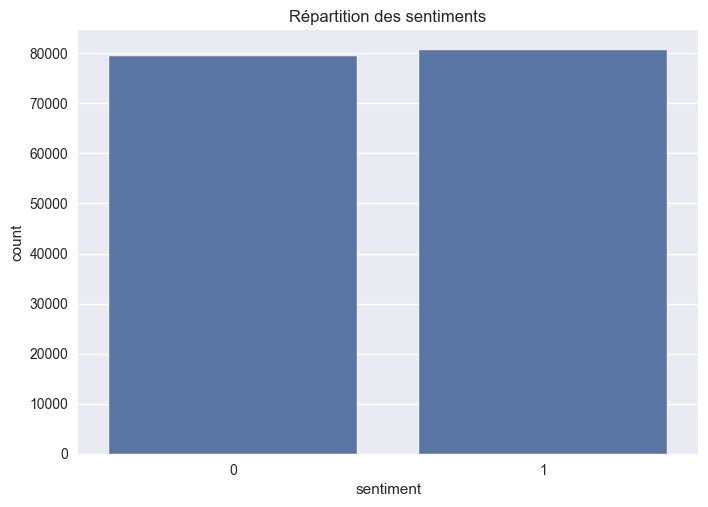

In [28]:
sns.countplot(x="sentiment", data=df)
plt.title("Répartition des sentiments")
plt.show()


# 10 - Sauvegarde du dataset :

In [ ]:
df.to_csv("../data/processed/train_clean.csv", index=False)


# 11 - Conclusion EDA :

Le dataset contient 160 000 avis de films.
Les sentiements sont relativement équilibrés.
Les avis négatifs sont en moyenne plus courts.
Le dataset est adapté à une tâche de classification NLP supervisée.
Le dataset nettoyé est sauvegardé dans data/processed/train_clean.csv et utilisé dans les notebooks suivants.